In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
import math
from keras.layers import Dense
from keras.layers import LSTM,RNN, Bidirectional
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

## **Import whole data:**

In [27]:
df=pd.read_csv("/content/Brazil (1).csv", engine='python')


## **Choose the country and new cases:**

In [28]:
df=df[df['location']=='United Kingdom']
df=df[['date','new_cases']]

In [29]:
df

,date,new_cases
16424,2019-12-31,0.0
16425,2020-01-01,0.0
16426,2020-01-02,0.0
16427,2020-01-03,0.0
16428,2020-01-04,0.0
...,...,...
16707,2020-10-09,17540.0
16708,2020-10-10,13864.0
16709,2020-10-11,15165.0
16710,2020-10-12,12872.0


## **Plot Figures:**

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


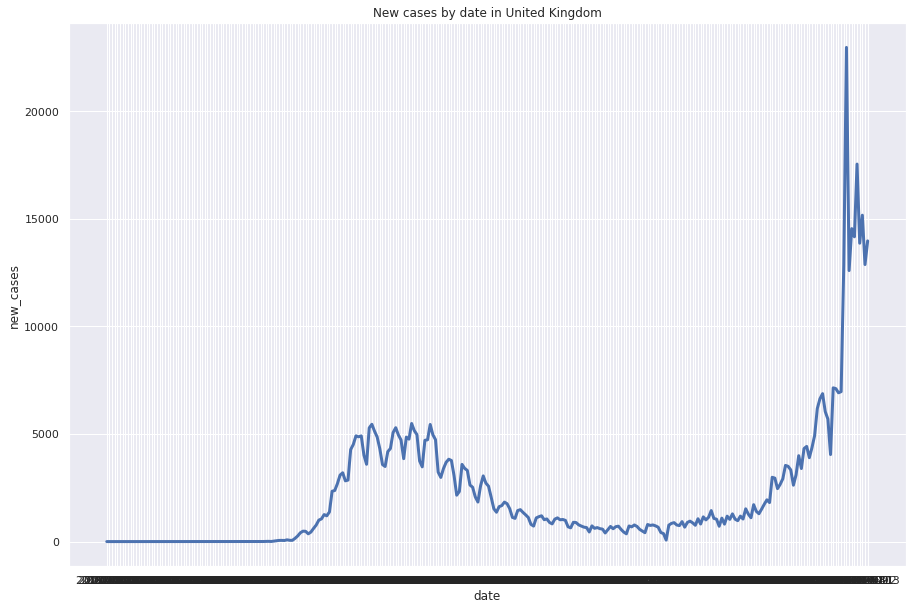

In [30]:
# plt.figure(figsize=(20,15))
# plt.subplot(211)
# plt.plot(df['date'],df['new_cases'])

sns.set_theme(style = 'darkgrid')
fig, ax = plt.subplots (figsize=(15,10))
sns.lineplot ('date','new_cases', data=df, linewidth=3)
plt.title ('New cases by date in United Kingdom')
plt.show()

#plt.figure(figsize=(20,10))
#plt.subplot(212)
#plt.plot(df_['date'],df_['new_deaths'],'r')
#plt.show()


# **Data Preprocessing:**

In [31]:
case_series=df['new_cases'].astype('float32')
case_series=pd.DataFrame(case_series)



In [32]:
case_series=case_series.fillna(0)
case_series

,new_cases
16424,0.0
16425,0.0
16426,0.0
16427,0.0
16428,0.0
...,...
16707,17540.0
16708,13864.0
16709,15165.0
16710,12872.0


In [33]:
import numpy
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset.iloc[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset.iloc[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [34]:
timestep=3
X_case, y_case = create_dataset(case_series, timestep)
#X_death,y_death=create_dataset(death_series,timestep)

In [35]:
train_size=int(len(case_series)*0.97)

In [36]:
x_case_train,x_case_valid=X_case[:train_size,:],X_case[train_size:,:]
y_case_train,y_case_valid=y_case[:train_size],y_case[train_size:]


In [37]:

n_features = 1
x_case_train = x_case_train.reshape((x_case_train.shape[0], x_case_train.shape[1], n_features))

x_case_test=x_case_valid.reshape((x_case_valid.shape[0], x_case_valid.shape[1], n_features))


## **Model preperation:**

In [38]:

model = Sequential()
model.add((LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
#model.add(Bidirectional(LSTM(20,activation='relu')))
#model.add(Bidirectional(LSTM(50,return_sequences=True,activation='relu', input_shape=(timestep, n_features))))
model.add((LSTM(30,activation='relu')))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(x_case_train,y_case_train, epochs=600, verbose=2)

Epoch 1/600
9/9 - 0s - loss: 10280025.0000
Epoch 2/600
9/9 - 0s - loss: 9655211.0000
Epoch 3/600
9/9 - 0s - loss: 9113414.0000
Epoch 4/600
9/9 - 0s - loss: 8587178.0000
Epoch 5/600
9/9 - 0s - loss: 8014171.0000
Epoch 6/600
9/9 - 0s - loss: 7414447.5000
Epoch 7/600
9/9 - 0s - loss: 6663342.0000
Epoch 8/600
9/9 - 0s - loss: 5225486.5000
Epoch 9/600
9/9 - 0s - loss: 2253097.0000
Epoch 10/600
9/9 - 0s - loss: 1489784.7500
Epoch 11/600
9/9 - 0s - loss: 1261630.6250
Epoch 12/600
9/9 - 0s - loss: 1210246.6250
Epoch 13/600
9/9 - 0s - loss: 1221250.6250
Epoch 14/600
9/9 - 0s - loss: 1208444.5000
Epoch 15/600
9/9 - 0s - loss: 1161443.8750
Epoch 16/600
9/9 - 0s - loss: 1139027.1250
Epoch 17/600
9/9 - 0s - loss: 1094252.1250
Epoch 18/600
9/9 - 0s - loss: 1084673.6250
Epoch 19/600
9/9 - 0s - loss: 1069624.6250
Epoch 20/600
9/9 - 0s - loss: 1061197.2500
Epoch 21/600
9/9 - 0s - loss: 1057408.7500
Epoch 22/600
9/9 - 0s - loss: 1033432.0000
Epoch 23/600
9/9 - 0s - loss: 1031614.2500
Epoch 24/600
9/9 - 

# **Check validation data:**

In [39]:

case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[train_size-15:(train_size+3-15)])

x_input=numpy.array(x_input)



In [40]:
x_input

array([4422., 3899., 4368.], dtype=float32)

In [41]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<(len(case_series)-train_size)):
    
    if(len(temp_input)>3):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[4629.761]
1 day input [3899.    4368.    4629.761]
[3899.    4368.    4629.761]
[[[3899.   ]
  [4368.   ]
  [4629.761]]]
1 day output [[4867.3843]]
2 day input [4368.     4629.761  4867.3843]
[4368.     4629.761  4867.3843]
[[[4368.    ]
  [4629.761 ]
  [4867.3843]]]
2 day output [[5105.8804]]
3 day input [4629.761  4867.3843 5105.8804]
[4629.761  4867.3843 5105.8804]
[[[4629.761 ]
  [4867.3843]
  [5105.8804]]]
3 day output [[5362.9404]]
4 day input [4867.3843 5105.8804 5362.9404]
[4867.3843 5105.8804 5362.9404]
[[[4867.3843]
  [5105.8804]
  [5362.9404]]]
4 day output [[5633.7964]]
5 day input [5105.8804 5362.9404 5633.7964]
[5105.8804 5362.9404 5633.7964]
[[[5105.8804]
  [5362.9404]
  [5633.7964]]]
5 day output [[5918.017]]
6 day input [5362.9404 5633.7964 5918.017 ]
[5362.9404 5633.7964 5918.017 ]
[[[5362.9404]
  [5633.7964]
  [5918.017 ]]]
6 day output [[6217.1353]]
7 day input [5633.7964 5918.017  6217.1353]
[5633.7964 5918.017  6217.1353]
[[[5633.7964]
  [5918.017 ]
  [6217.1353]

In [42]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(train_size,train_size+(len(case_series)-train_size))


In [43]:
lst_output=numpy.array(lst_output)
lst_output

array([4629.761 , 4867.3843, 5105.8804, 5362.9404, 5633.7964, 5918.017 ,
       6217.1353, 6531.932 , 6863.125 ], dtype=float32)

No handles with labels found to put in legend.


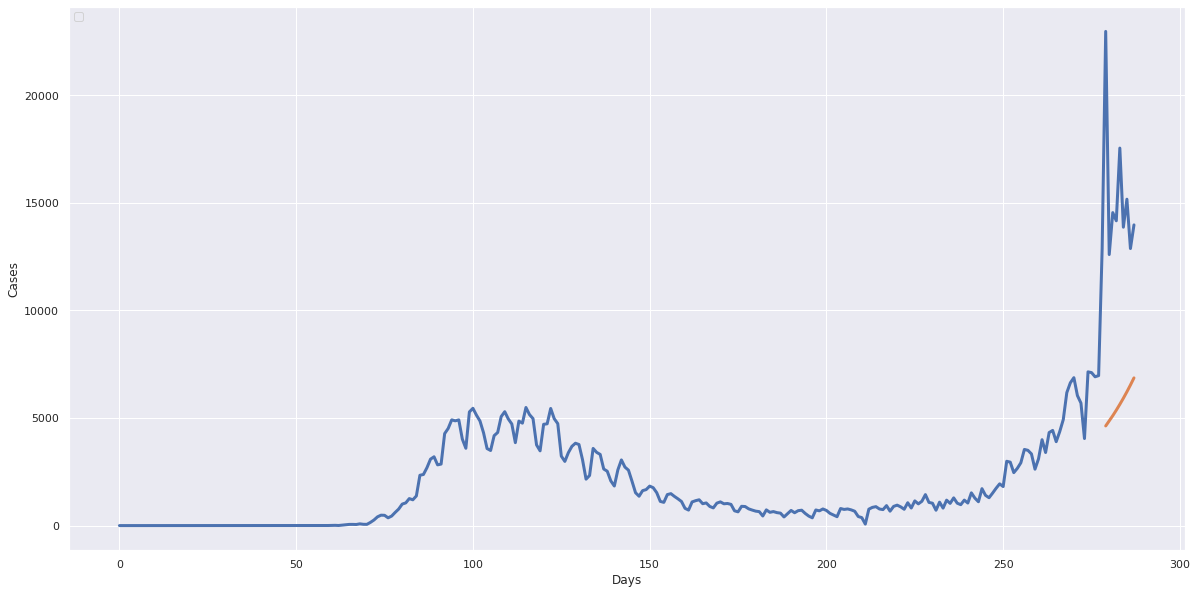

In [44]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.show()

# Forecasting:

---



---



In [45]:
case_series_=(df['new_cases'].astype('float32')).fillna(0)
x_input=(case_series_[-timestep:])
x_input=numpy.array(x_input)



In [46]:

x_input

array([15165., 12872., 13972.], dtype=float32)

In [47]:
temp_input=list(x_input)
lst_output=[]
#lst_output.append(x_input)
i=0
while(i<40):
    
    if(len(temp_input)>3):
        x_input=numpy.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        print(x_input)
        x_input = x_input.reshape((1, timestep, n_features))
        print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        #print("to")
        #x_input=numpy.array(temp_input[1:])
        x_input = x_input.reshape((1, timestep, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)

[14988.969]
1 day input [12872.    13972.    14988.969]
[12872.    13972.    14988.969]
[[[12872.   ]
  [13972.   ]
  [14988.969]]]
1 day output [[15814.418]]
2 day input [13972.    14988.969 15814.418]
[13972.    14988.969 15814.418]
[[[13972.   ]
  [14988.969]
  [15814.418]]]
2 day output [[16631.629]]
3 day input [14988.969 15814.418 16631.629]
[14988.969 15814.418 16631.629]
[[[14988.969]
  [15814.418]
  [16631.629]]]
3 day output [[17481.822]]
4 day input [15814.418 16631.629 17481.822]
[15814.418 16631.629 17481.822]
[[[15814.418]
  [16631.629]
  [17481.822]]]
4 day output [[18383.572]]
5 day input [16631.629 17481.822 18383.572]
[16631.629 17481.822 18383.572]
[[[16631.629]
  [17481.822]
  [18383.572]]]
5 day output [[19332.19]]
6 day input [17481.822 18383.572 19332.19 ]
[17481.822 18383.572 19332.19 ]
[[[17481.822]
  [18383.572]
  [19332.19 ]]]
6 day output [[20329.295]]
7 day input [18383.572 19332.19  20329.295]
[18383.572 19332.19  20329.295]
[[[18383.572]
  [19332.19 ]
  [

In [48]:
day_new=numpy.arange(0,len(case_series))
#day_pred=numpy.arange(250,550)
day_pred=numpy.arange(len(case_series)-1,len(case_series)+39)


No handles with labels found to put in legend.


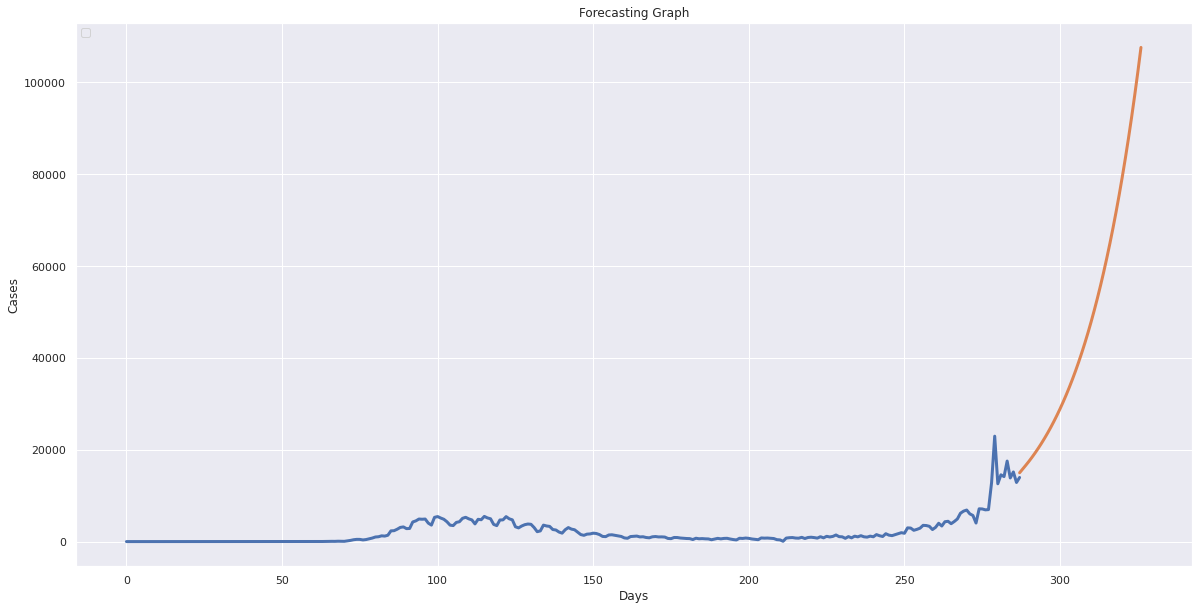

In [49]:
# plt.figure(figsize=(20,10))
# plt.plot(day_new,case_series)
# plt.plot(day_pred,lst_output)
#plt.plot(case_series_)

fig, ax = plt.subplots(figsize=(20,10))
plt.plot(day_new,case_series, linewidth = 3)
plt.plot(day_pred,lst_output, linewidth = 3)
plt.xlabel('Days')
plt.ylabel ('Cases')
plt.legend(loc = 'upper left')
plt.title('Forecasting Graph')
plt.show()